Laden der Lightkurve Bibliothek. 
%matplotlib inline sorgt für die richtige Darstellung der Graphiken

In [1]:
import lightkurve as lk
%matplotlib inline

Suchen der Targetpixelfiles, die für AR Her verfügbar sind

In [2]:
tpf=lk.search_targetpixelfile('AR Her')
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 51,2022,SPOC,120,417569965,0.0
1,TESS Sector 51,2022,TESS-SPOC,600,417569965,0.0


Download eines TPF

In [3]:
tpf = tpf[0].download()

Darstellung als Animation

In [4]:
tpf.animate()

oder Darstellung als statischer Plot für eine ausgewählte Kadenz

<Axes: title={'center': 'Target ID: 417569965, Cadence: 1055155'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

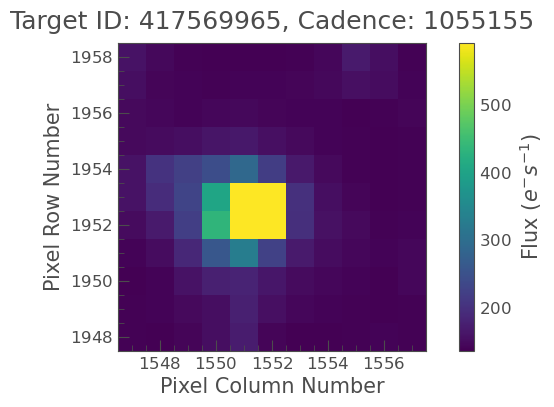

In [5]:
tpf[0].plot()

Oder Darstellung mit der von der Verarbeitungspipeline standardmäßig erzeugten Maske für die Photometrie

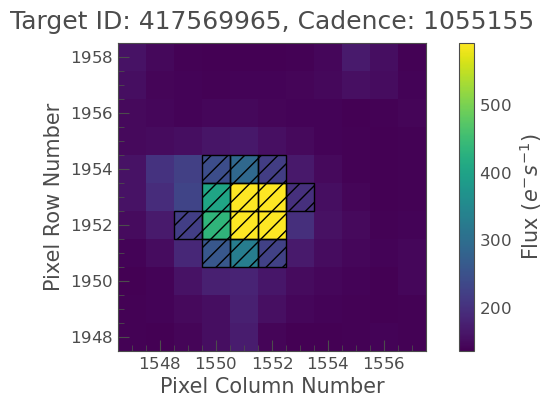

In [6]:
tpf[0].plot(aperture_mask=tpf[0].pipeline_mask, mask_color='k');

Die kann man im ersten Anlauf so lassen. Es gibt keine eng benachbarten Sterne die das Ergebnis verfälschen könnten.
Damit kann man dann aus dem TPF eine Lichtkurce erzeugen:

In [7]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

Der Plot zeigt einen schönen Blazkho - Effekt

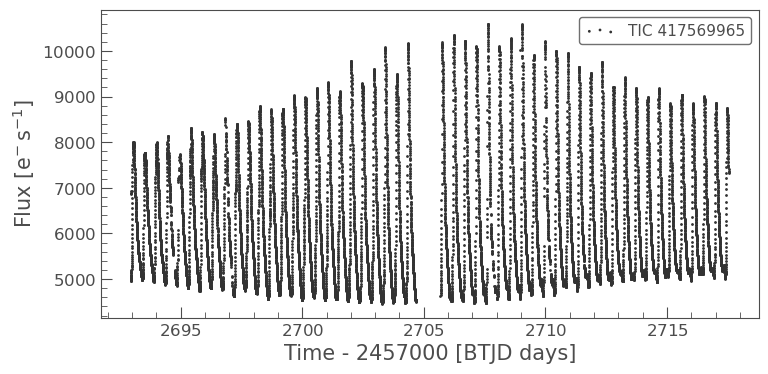

In [8]:
lc.scatter();

Um den noch deutlicher darzustelllen bestimmen wir mit dem Periodogramm die Grundfrequenz

In [9]:
pg = lc.to_periodogram(method="ls",minimum_period=0.2,maximum_period=1,oversample_factor=100)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

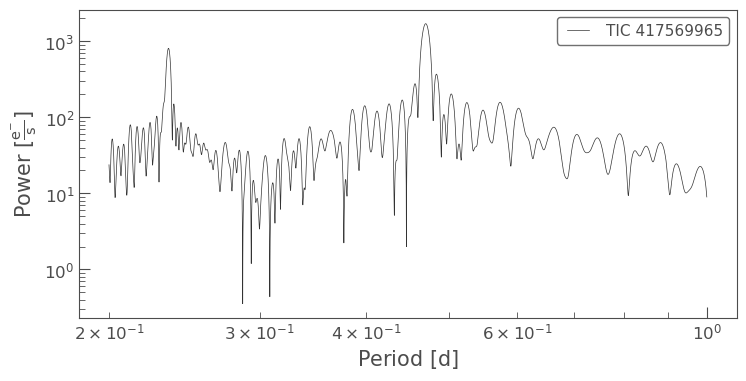

In [10]:
pg.plot(view="period",scale="log")

In [11]:
pg.period_at_max_power

<Quantity 0.46923402 d>

und nutzen dann die Möglichkeit von Lightkurve ein gefaltete Lichkurce zu erzeugen. (epoch_phase gibt dabei an, welche Phase dem ersten Zeitstemple in der Lichtkurve zugeordnet werden soll. Man könnte auch ein Maximum bestimmen mit mit epoch_time das als Aufsatz für epoch_phase definieren)

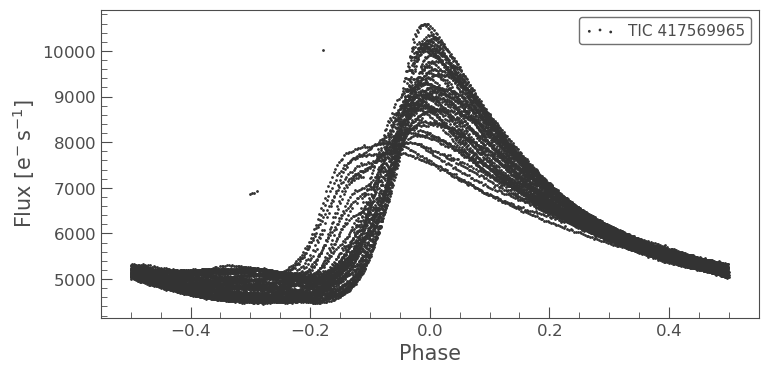

In [19]:
lcf=lc.fold(period=pg.period_at_max_power,epoch_phase=0.7,normalize_phase=True)
lcf.scatter();

Schauen wir uns die Struktur des ERgebnsses an

In [20]:
lcf

time,flux,flux_err,time_original,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,,pix,pix,,
float64,float32,float32,Time,float64,float64,int32,int32
-0.4999449534582538,5212.41845703125,9.42938232421875,2713.0336161762534,1551.07007021079,1952.4813337315913,1069615,0
-0.49993378160627855,5316.076171875,11.617566108703613,2694.2642606725585,1551.0743359907012,1952.4446150260385,1056101,4096
-0.4998536914170847,5012.52880859375,8.551897048950195,2703.648978626554,1551.070706851053,1952.4361410623394,1062858,0
-0.4998354417625564,5148.833984375,8.672000885009766,2716.3183056934004,1551.0735437394474,1952.4804753186922,1071980,0
-0.49975582541981933,5204.76513671875,9.953206062316895,2697.548982306189,1551.0695192556254,1952.4487631157042,1058466,0
-0.49973212044785836,5060.22021484375,11.247224807739258,2706.933673802322,1551.0677855192928,1952.47379761316,1065223,4096
-0.4996201405029898,5101.90576171875,10.363513946533203,2710.2183644776555,1551.0706507021134,1952.4844609077916,1067588,0
-0.49957773140799644,5144.0341796875,9.155089378356934,2700.8337040044917,1551.070019345726,1952.4389518237906,1060831,0


Die Spalte time_original ordnet jemdem Datenpunkt in der gefalteten Lichtkurve die urprüngliche Beobachtungszeit zu. Das kann z.B, genutzt werden um im Scatterplot die Punkte entsprechend des Zeitverlaufs einzufärben:

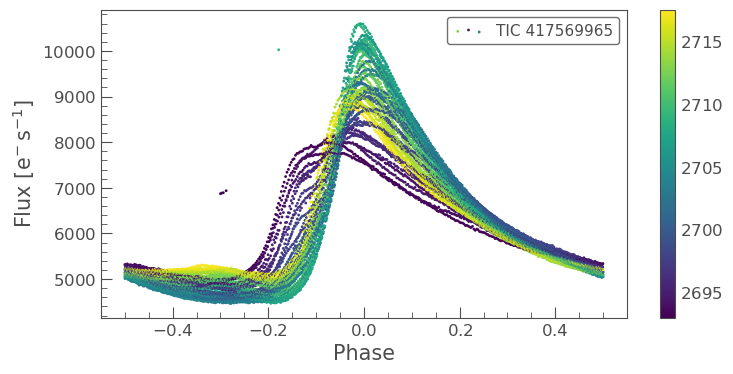

In [21]:
lcf.scatter(c=lcf.time_original.value);